# Online Retail Exploratory Data Analysis with Python

### Portfolio Project by Md. Shifat Karim

This notebook contains an exploratory data analysis (EDA) of an online retail dataset. The goal is to uncover insights about customer behavior, sales trends, and other key metrics that can inform business decisions.

#### Objectives:
1. Understand the structure of the dataset.
2. Perform data cleaning and preprocessing.
3. Explore sales patterns and customer insights.
4. Identify potential business opportunities or trends.


In [319]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [320]:
df = pd.read_excel("C:\\Users\\user\\Downloads\\Online Retail.xlsx")

In [321]:
data = pd.DataFrame(df)

In [322]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Dataset Description
The dataset contains transactional data from an online retailer. Each row represents a unique transaction with the following attributes:
- **InvoiceNo**: Invoice number for the transaction.
- **StockCode**: Product code.
- **Description**: Product description.
- **Quantity**: Number of items purchased.
- **InvoiceDate**: Date of the transaction.
- **UnitPrice**: Price per unit of the product.
- **CustomerID**: Unique identifier for each customer.
- **Country**: Country where the transaction took place.

#### Key Questions to Address:
1. What are the overall sales trends?
2. Which products are the most popular?
3. What is the revenue contribution by country?
4. Who are the top customers by revenue?
5. Are there any seasonal patterns in sales?


## Data Cleaning and Preprocessing

In this section, we will:
1. Handle missing values.
2. Remove duplicates.
3. Check and correct data types.

In [323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Observations:
##### Missing Values:
Description has 540,455 non-null values out of 541,909 (about 0.27% missing).
CustomerID has 406,829 non-null values out of 541,909 (about 24.9% missing).
##### Data Types:
InvoiceDate is correctly converted to datetime64[ns].
CustomerID and InvoiceNo are float64 but should likely be treated as a string or categorical variable.

In [324]:
data['CustomerID'] = data['CustomerID'].astype(str)

In [325]:
data['InvoiceNo'] = data['InvoiceNo'].astype(str)

In [326]:
data['InvoiceNo'] = data['InvoiceNo'].fillna('000000')

In [327]:
data['Description'] = data['Description'].fillna('Unknown')

In [328]:
data.duplicated().sum()

5268

In [329]:
data.drop_duplicates(inplace = True)

In [330]:
data.describe()

,Quantity,UnitPrice
count,536641.000000,536641.000000
mean,9.620029,4.632656
std,219.130156,97.233118
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


#### New feature
We will add some column with new feature like day, month and time of the sells for better understanding of the data set. And calculate total amount of a Invoice and add a new column Total amount.

In [331]:
data['DayOfWeek'] = data ['InvoiceDate'].dt.day_name()
data['MonthName'] = data ['InvoiceDate'].dt.month_name()
data['Year'] = data ['InvoiceDate'].apply(lambda x : x.year)
data['Month'] = data ['InvoiceDate'].apply(lambda x : x.month)
data['Hour'] = data ['InvoiceDate'].apply(lambda x : x.hour)
data['Minute'] = data ['InvoiceDate'].apply(lambda x : x.minute)

In [332]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [333]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek,MonthName,Year,Month,Hour,Minute,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,2010,12,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,2010,12,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,8,26,20.34


## 1: Canceled order
As mentioned in the description of the dataset, some InvoiceNo start with the letter "c" = canceled. We will separate them first to analyze.

In [334]:
canceled_orders = data[data['InvoiceNo'].str.startswith('C')]

successful_orders = data[~data['InvoiceNo'].str.startswith('C')]

print(f"Total canceled orders: {canceled_orders.shape[0]}")
print(f"Total successful orders: {successful_orders.shape[0]}")

Total canceled orders: 9251
Total successful orders: 527390


In [335]:
canceled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek,MonthName,Year,Month,Hour,Minute,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Wednesday,December,2010,12,9,41,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Wednesday,December,2010,12,9,49,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Wednesday,December,2010,12,10,24,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Wednesday,December,2010,12,10,24,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Wednesday,December,2010,12,10,24,-6.96


In [336]:
most_canceled_products = canceled_orders.groupby('Description')['Quantity'].sum().sort_values()

most_canceled_products.head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           -80995
MEDIUM CERAMIC TOP STORAGE JAR        -74494
ROTATING SILVER ANGELS T-LIGHT HLDR    -9376
Manual                                 -4066
FAIRY CAKE FLANNEL ASSORTED COLOUR     -3150
WHITE HANGING HEART T-LIGHT HOLDER     -2578
GIN + TONIC DIET METAL SIGN            -2030
HERB MARKER BASIL                      -1527
FELTCRAFT DOLL MOLLY                   -1447
TEA TIME PARTY BUNTING                 -1424
Name: Quantity, dtype: int64

##### Cancellation Trends Over Time
Time-based patterns of cancellations

C:\Users\user\AppData\Local\Temp\ipykernel_29020\4026636447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canceled_orders['TotalPrice'] = canceled_orders['Quantity'] * canceled_orders['UnitPrice']


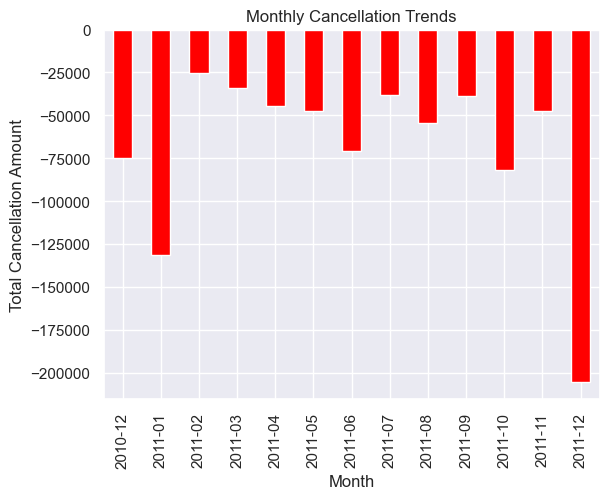

In [337]:
canceled_orders['TotalPrice'] = canceled_orders['Quantity'] * canceled_orders['UnitPrice']

cancellation_trends = canceled_orders.groupby(canceled_orders['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum()

cancellation_trends.plot(kind='bar', title='Monthly Cancellation Trends', color='red')
plt.xlabel('Month')
plt.ylabel('Total Cancellation Amount')
plt.show()


### Key Observations:
1. **Consistent Negative Values**:
   - Cancellations occur in every month, consistently contributing to revenue loss.
   - The negative amounts signify refunds or adjustments caused by canceled orders.

2. **Major Cancellations in December 2011**:
   - The most significant cancellation amount is observed in **December 2011**, exceeding all other months by a large margin.
   - This spike could indicate operational issues, such as supply chain problems, customer dissatisfaction, or holiday-related return policies.

3. **January 2011 Spike**:
   - **January 2011** also exhibits a relatively large cancellation amount, possibly driven by post-holiday returns or unmet demand from December 2010.

4. **Other Months**:
   - Cancellation amounts remain relatively stable during the rest of the year, with no other significant spikes.

---

### Potential Causes:
- **Seasonal Effects**:
   - Higher cancellations in January and December suggest a link to holiday shopping, where customers might return or cancel orders after the festive season.
- **Operational Challenges**:
   - December's cancellation peak may reflect logistical issues, delays, or quality concerns during high-demand periods.
- **Policy Changes**:
   - Changes in return or cancellation policies during peak seasons might amplify refund volumes.

---

### Recommendations:
1. **Analyze December 2011**:
   - Investigate operational inefficiencies or customer complaints contributing to the high cancellation rate in December.
2. **Improve Holiday Logistics**:
   - Enhance inventory and delivery management during peak periods to minimize order cancellations.
3. **Review Return Policies**:
   - Ensure clear communication of cancellation and return policies to customers to reduce unnecessary cancellations.
4. **Customer Feedback**:
   - Collect and analyze customer feedback during high-cancellation months to identify root causes and address them proactively.

In [338]:
total_cancellation_loss = canceled_orders['TotalPrice'].sum()

print("We have ",len(cancelled_orders), " cancelled orders.")
total_orders = data['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))
print(f"Total revenue loss due to cancellations: £{total_cancellation_loss:.2f}")

We have  9288  cancelled orders.
Percentage of orders canceled: 9288/25900 (35.86%) 
Total revenue loss due to cancellations: £-893979.73


We have a large percentage of cancelled orders of £-893979.73 and 35.86%. Studying these cancelled orders may help in preventing future cancellation. Let's first get an overview of the general customers purchase behavior and then dig deeper.

### Handling Canceled Orders
- Canceled orders are identified by negative `Quantity` values.
- These orders are stored in a separate DataFrame (`canceled_orders`) for analysis.
- The main analysis will focus only on successful orders stored in the `successful_orders` DataFrame.

In [339]:
successful_orders.describe()

,Quantity,UnitPrice,Year,Month,Hour,Minute,TotalPrice
count,527390.000000,527390.000000,527390.000000,527390.000000,527390.000000,527390.000000,527390.000000
mean,10.311272,3.861939,2010.921762,7.549497,13.075841,30.005808,20.136875
std,160.367285,41.963759,0.268546,3.508399,2.442776,16.960770,271.907138
min,-9600.000000,-11062.060000,2010.000000,1.000000,6.000000,0.000000,-11062.060000
25%,1.000000,1.250000,2011.000000,5.000000,11.000000,16.000000,3.780000
50%,3.000000,2.080000,2011.000000,8.000000,13.000000,30.000000,9.900000
75%,11.000000,4.130000,2011.000000,11.000000,15.000000,44.000000,17.700000
max,80995.000000,13541.330000,2011.000000,12.000000,20.000000,59.000000,168469.600000


#### Negative unit price
We can see the minimum value for unit price is negative. Which can not be right. Things cannot be sold for negative values. So, we need to investigate what is it.

In [340]:
negative_values = successful_orders[(successful_orders['Quantity'] < 0)]

print(f"Number of rows with negative Quantity: {negative_values.shape[0]}")

negative_values.head()

Number of rows with negative Quantity: 1336


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek,MonthName,Year,Month,Hour,Minute,TotalPrice
2406,536589,21777,Unknown,-10,2010-12-01 16:50:00,0.0,nan,United Kingdom,Wednesday,December,2010,12,16,50,-0.0
4347,536764,84952C,Unknown,-38,2010-12-02 14:42:00,0.0,nan,United Kingdom,Thursday,December,2010,12,14,42,-0.0
7188,536996,22712,Unknown,-20,2010-12-03 15:30:00,0.0,nan,United Kingdom,Friday,December,2010,12,15,30,-0.0
7189,536997,22028,Unknown,-20,2010-12-03 15:30:00,0.0,nan,United Kingdom,Friday,December,2010,12,15,30,-0.0
7190,536998,85067,Unknown,-6,2010-12-03 15:30:00,0.0,nan,United Kingdom,Friday,December,2010,12,15,30,-0.0


We can see that the negative Quantity doesn't have any impact on the total amount of sells. So, we can assume that those are restocking of goods. We'll just remove them

In [341]:
successful_orders = successful_orders[(successful_orders['Quantity'] > 0)]

## 2: Sells per Day of the week
Not everyday of the week has the same amount of sales. Customers are not available all the saven day. So, which day of the week it is might have an impact on the sale. Let's find out.

In [342]:
orders_sales_by_day = successful_orders.groupby('DayOfWeek').agg(
    TotalOrders=('InvoiceNo', 'nunique'),
    TotalSales=('TotalPrice', 'sum')
).reset_index()

In [343]:
orders_sales_by_day = orders_sales_by_day.sort_values(by='TotalOrders', ascending=False)

orders_sales_by_day

,DayOfWeek,TotalOrders,TotalSales
3,Thursday,4408,2199292.570
5,Wednesday,3865,1847074.380
4,Tuesday,3717,2175700.511
0,Friday,3294,1815346.371
1,Monday,3237,1775782.071
2,Sunday,2207,806790.781


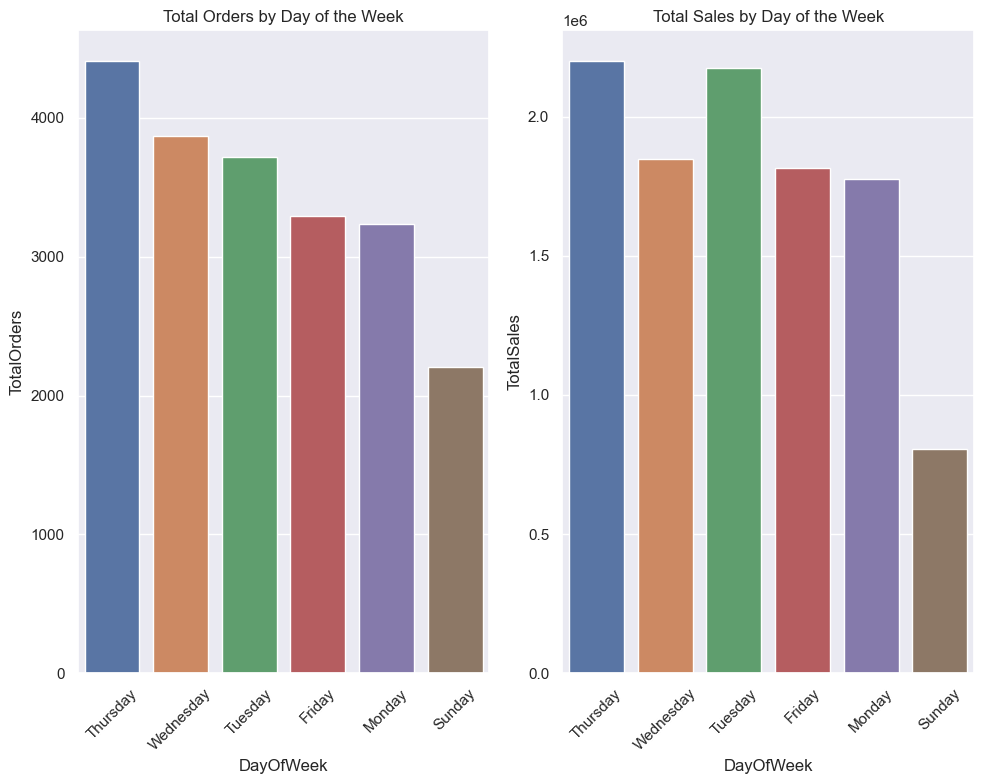

In [344]:
fig, axs = plt.subplots(1, 2, figsize=(10, 8))


sns.barplot(x='DayOfWeek', y='TotalOrders', data=orders_sales_by_day, ax=axs[0])
axs[0].set_title('Total Orders by Day of the Week')
axs[0].tick_params(axis='x', rotation=45) 

sns.barplot(x='DayOfWeek', y='TotalSales', data=orders_sales_by_day, ax=axs[1])
axs[1].set_title('Total Sales by Day of the Week')
axs[1].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()


### **Key Observations**
1. **Day with Most Orders**
   - **Thursday** has the highest number of orders (**4,408**).
   - It also has the highest total sales, contributing to **£2,199,292.57**.

2. **Other High-Performing Days**
   - **Tuesday** follows closely in terms of total sales (**£2,175,700.51**) despite having fewer orders than Wednesday. This indicates that orders on Tuesday might have higher average value.
   - **Wednesday** has the second-highest number of orders (**3,865**) and total sales of **£1,847,074.38**.

3. **Day with Lowest Orders and Sales**
   - **Sunday** records the lowest number of orders (**2,207**) and total sales (**£806,790.78**).

---

### **Insights**
- **Midweek Performance**: Thursday, Wednesday, and Tuesday are the busiest and most profitable days, indicating strong midweek activity.
- **Weekend Dip**: Sales and orders drop significantly on Sunday, possibly reflecting consumer behavior trends.

### Average Order Value (AOV) by Day

In [345]:
orders_sales_by_day['AverageOrderValue'] = orders_sales_by_day['TotalSales'] / orders_sales_by_day['TotalOrders']
print(orders_sales_by_day)

   DayOfWeek  TotalOrders   TotalSales  AverageOrderValue
3   Thursday         4408  2199292.570         498.932071
5  Wednesday         3865  1847074.380         477.897640
4    Tuesday         3717  2175700.511         585.337775
0     Friday         3294  1815346.371         551.106974
1     Monday         3237  1775782.071         548.588839
2     Sunday         2207   806790.781         365.559937


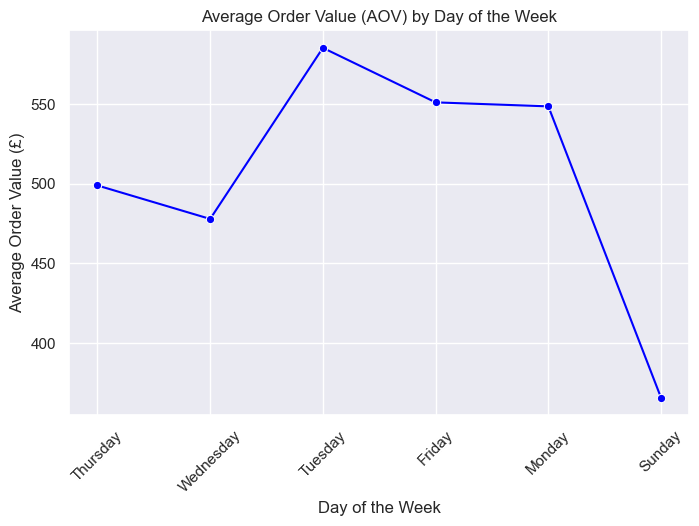

In [346]:
plt.figure(figsize=(8, 5))
sns.lineplot(
    x='DayOfWeek', y='AverageOrderValue', data=orders_sales_by_day, marker='o', color='blue'
)
plt.title('Average Order Value (AOV) by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Order Value (£)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### **Findings from the Table**

1. **Highest Average Order Value (AOV):**
   - **Tuesday** has the highest AOV at **£585.34**, even though it has fewer orders compared to Thursday and Wednesday.
   - This indicates that Tuesday's orders are likely of higher value, making it a crucial day for revenue.

2. **Consistent Midweek Sales:**
   - **Thursday** has the highest total orders (**4,408**) and total sales (**£2,199,292.57**) but a lower AOV (**£498.93**) compared to Tuesday and Friday.
   - **Wednesday** also performs well but has the lowest AOV among midweek days (**£477.90**).

3. **Sunday Lagging Behind:**
   - Sunday records the lowest performance across all metrics:
     - Total Orders: **2,207**
     - Total Sales: **£806,790.78**
     - AOV: **£365.56**

## 3: Busiest Hour
We want look which hour of the days of the week are the busiest

In [347]:
sales_by_day_hour = successful_orders.groupby(['DayOfWeek', 'Hour']).agg({'TotalPrice': 'sum', 'Quantity': 'sum'}).reset_index()

sales_pivot = sales_by_day_hour.pivot(index='DayOfWeek', columns='Hour', values='TotalPrice')
items_pivot = sales_by_day_hour.pivot(index='DayOfWeek', columns='Hour', values='Quantity')

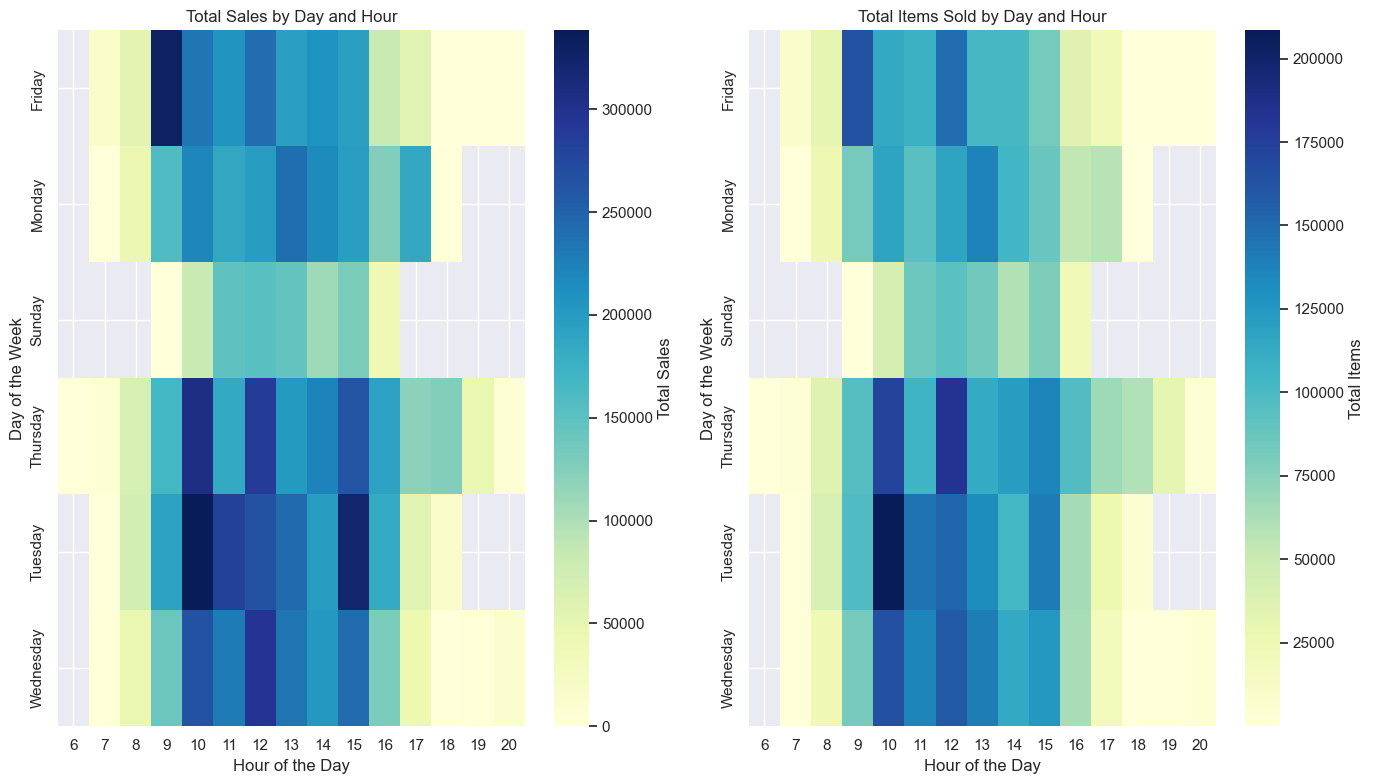

In [348]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

sns.heatmap(sales_pivot, cmap='YlGnBu', ax=axs[0], annot=False, cbar_kws={'label': 'Total Sales'})
axs[0].set_title('Total Sales by Day and Hour')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Day of the Week')

sns.heatmap(items_pivot, cmap='YlGnBu', ax=axs[1], annot=False, cbar_kws={'label': 'Total Items'})
axs[1].set_title('Total Items Sold by Day and Hour')
axs[1].set_xlabel('Hour of the Day')
axs[1].set_ylabel('Day of the Week')

plt.tight_layout()
plt.show()


### Insights
1. **Total Sales by Day and Hour (Left Heatmap)**:
   - **Observation**: 
     - The highest sales tend to occur between **11:00 AM and 3:00 PM** across multiple days, especially on **Thursday** and **Friday**.
     - **Friday** appears to have a significant sales spike compared to other days.
     - Early morning and late evening hours show much lower sales, which is expected in many business contexts.

   - **Recommendation**:
     - Focus marketing efforts and special promotions during peak hours (11:00 AM - 3:00 PM), especially on **Thursdays** and **Fridays**.

2. **Total Items Sold by Day and Hour (Right Heatmap)**:
   - **Observation**:
     - A similar trend to sales is observed, with the largest number of items sold occurring in the late morning and early afternoon hours.
     - **Wednesday** and **Tuesday** also see a significant number of items sold between **10:00 AM and 2:00 PM**, though the sales amount might not be as high.
     - This might indicate that more items of lower value are being sold on these days.

   - **Recommendation**:
     - Consider running inventory checks and ensuring stock availability for high-demand items during these peak hours, especially on **Wednesdays** and **Tuesdays**.
     - If feasible, offer bundle discounts or promotions on high-selling items during these times.

3. **General Insights**:
   - The patterns of both total sales and items sold align closely, which suggests that sales value is driven by both item volume and potentially higher-priced items during peak hours.
   - Low sales during early morning (before 8:00 AM) and late evening (after 6:00 PM) hours might not justify staffing or operational expenses during these times unless it's critical for business continuity.

4. **Next Steps**:
   - Add annotations for the specific peak hours in the heatmaps to make the insights more explicit.
   - Combine this analysis with customer segmentation (e.g., for top buyers) to see if specific groups are driving these trends.
   - If feasible, evaluate weekend activity, as **Sunday** shows a noticeable drop in both sales and items sold.

Let me know if you'd like further insights or refinements!

## 4: Top Products
Not every products sold at the same quantity. We'll look into the top selling products and find the coustomers behaviours.

In [349]:
top_products = data['Description'].value_counts().reset_index()
top_products.columns = ["Products", 'TotalQuantity']
top_ten_products = top_products[:11]
top_ten_products

,Products,TotalQuantity
0,WHITE HANGING HEART T-LIGHT HOLDER,2357
1,REGENCY CAKESTAND 3 TIER,2189
2,JUMBO BAG RED RETROSPOT,2156
3,PARTY BUNTING,1720
4,LUNCH BAG RED RETROSPOT,1625
5,ASSORTED COLOUR BIRD ORNAMENT,1488
6,SET OF 3 CAKE TINS PANTRY DESIGN,1465
7,Unknown,1454
8,PACK OF 72 RETROSPOT CAKE CASES,1367
9,LUNCH BAG BLACK SKULL.,1323


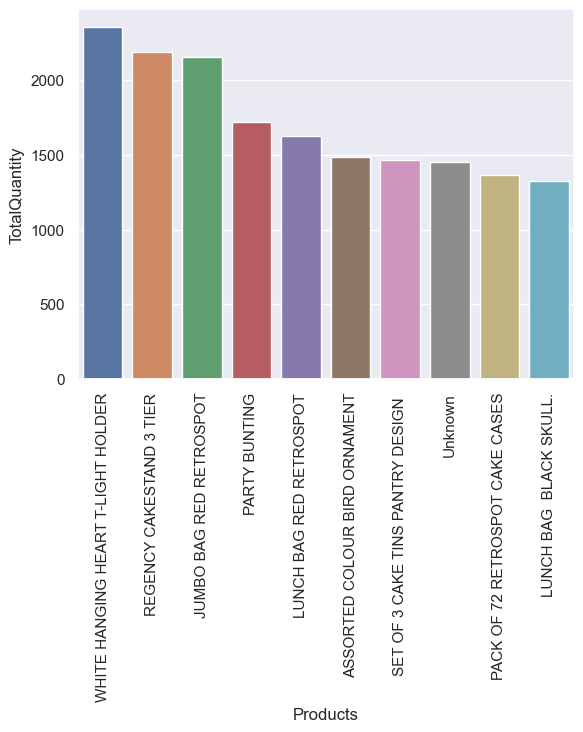

In [350]:
sns.barplot(x = "Products", y = 'TotalQuantity', data = top_products[:10])
plt.xticks(rotation=90)
plt.show()

#### Observations:

1. **Top Product**: The most popular product is the **White Hanging Heart T-Light Holder**, with over 2,300 purchases. This indicates it has strong demand.
   
2. **Close Competitors**: Products like **Regency Cake Stand (3-Tier)** and **Jumbo Bag Red Retrospot** are almost equally popular, making them significant contributors to sales.

3. **Diversity of Products**: The top products include a mix of decorative items (e.g., heart t-light holder, cake stands), functional items (e.g., lunch bags, jumbo bags), and party supplies (e.g., party bunting, retrospot cake cases).

4. **Unknown Products**: The presence of the "Unknown" product in the top 10 suggests missing or incomplete descriptions in the dataset. This could indicate potential issues in inventory labeling or data entry that may need to be addressed.

5. **Lower Range**: The products towards the lower end, such as **Pack of 72 Retrospot Cake Cases** and **Lunch Bag Black Skull**, still exhibit significant popularity but are purchased less frequently than the leading items.

#### Let's look if those top selling products are somehow related to seasons

In [351]:
top_10_products_id = top_ten_products['Products'].tolist()

top_10_products_data = data[data['Description'].isin(top_10_products_id)]

In [352]:
product_month_data = top_10_products_data.groupby(['Description', 'Month']).size().unstack(fill_value=0)

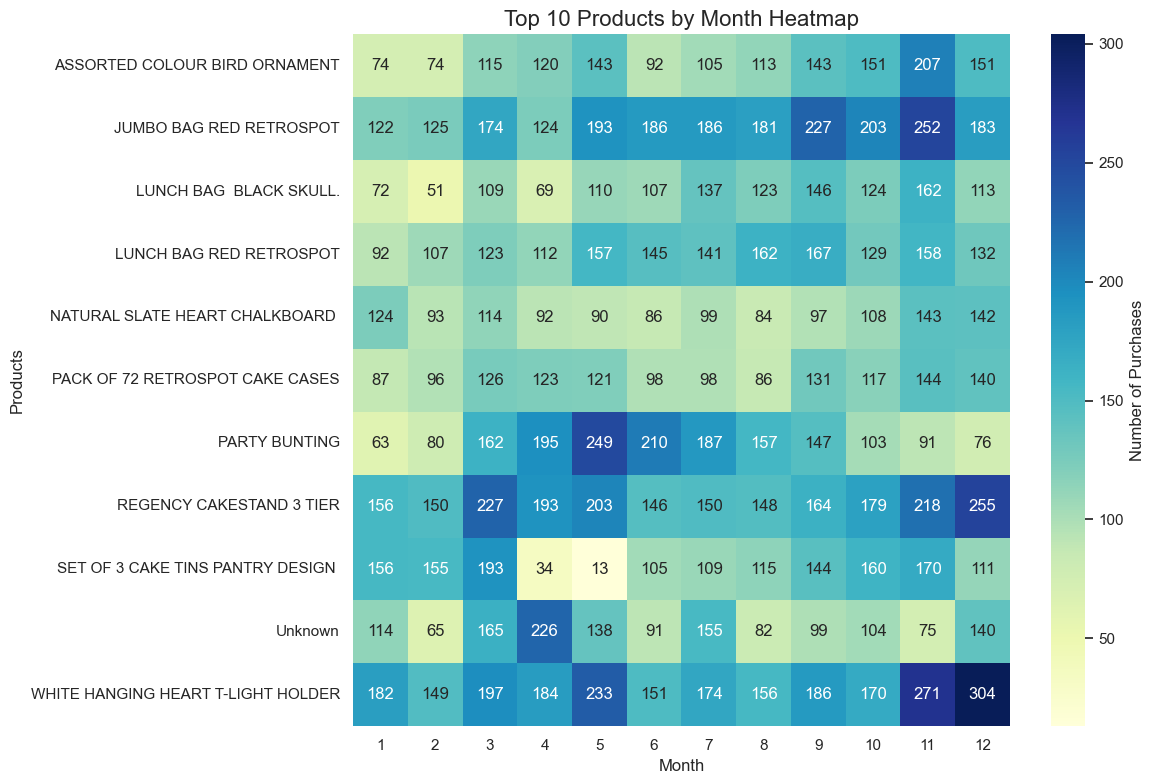

In [353]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    product_month_data,
    cmap='YlGnBu',
    annot=True,
    fmt='d',
    cbar_kws={'label': 'Number of Purchases'}
)
plt.title("Top 10 Products by Month Heatmap", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Products", fontsize=12)

plt.tight_layout()
plt.show()

#### Observations:
- **Seasonal Peaks**:
   - Certain products show high purchase volumes in specific months. For instance:
     - "WHITE HANGING HEART T-LIGHT HOLDER" peaks in months 11 and 12.
     - "PARTY BUNTING" experiences a notable spike in month 5.
- **Consistent Performers**:
   - Some products, such as "REGENCY CAKESTAND 3 TIER," maintain relatively high purchase counts throughout the year.
- **Potential Patterns**:
   - This heatmap may indicate seasonality, holiday trends, or promotional effects influencing consumer behavior.

---

#### Applications:
- **Inventory Planning**:
   - Use the heatmap to stock products according to peak demand months.
- **Marketing Campaigns**:
   - Target promotional efforts during months with historically low purchase counts.
- **Trend Analysis**:
   - Identify long-term purchasing patterns for future forecasting.

## 5: The Top Buyers
We will analyze the top ten buyers and find out more insight.

In [354]:
len(successful_orders['CustomerID'].unique())   

4340

There is 4340 numbers of unique buyers. Now we'll find out who the top ten are, what they wants and which day of the week, which month they buy the most.

In [355]:
top_buyers_by_total_amount = successful_orders.groupby('CustomerID')['TotalPrice'].sum()
top_buyers_by_number_of_items = successful_orders.groupby('CustomerID')['Quantity'].sum()

top_10_buyers_by_total_amount = top_buyers_by_total_amount.sort_values(ascending=False).head(11).reset_index()
top_10_buyers_by_number_of_items = top_buyers_by_number_of_items.sort_values(ascending=False).head(11).reset_index()

top_10_buyers_by_total_amount.columns = ['CustomerID', 'TotalSpending']
top_10_buyers_by_number_of_items.columns = ['CustomerID', 'TotalItems']

top_10_buyers_by_total_amount = top_10_buyers_by_total_amount[1:]
top_10_buyers_by_number_of_items = top_10_buyers_by_number_of_items[1:]

print("Top 10 Buyers by Total Spending:")
print(top_10_buyers_by_total_amount)

print("\nTop 10 Buyers by Total Items Purchased:")
print(top_10_buyers_by_number_of_items)


Top 10 Buyers by Total Spending:
   CustomerID  TotalSpending
1     14646.0      280206.02
2     18102.0      259657.30
3     17450.0      194390.79
4     16446.0      168472.50
5     14911.0      143711.17
6     12415.0      124914.53
7     14156.0      117210.08
8     17511.0       91062.38
9     16029.0       80850.84
10    12346.0       77183.60

Top 10 Buyers by Total Items Purchased:
   CustomerID  TotalItems
1     14646.0      197491
2     16446.0       80997
3     14911.0       80490
4     12415.0       77670
5     12346.0       74215
6     17450.0       69973
7     17511.0       64549
8     18102.0       64124
9     13694.0       63312
10    14298.0       58343


C:\Users\user\AppData\Local\Temp\ipykernel_29020\692912347.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


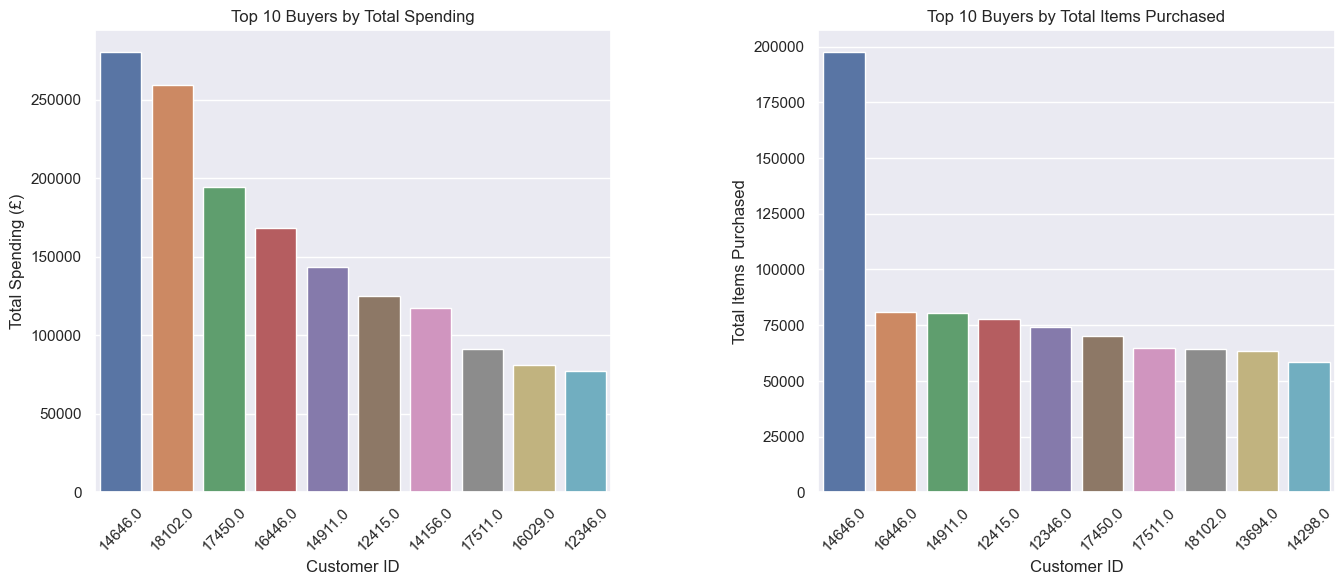

In [356]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'wspace': 0.4})

sns.barplot(
    x='CustomerID', y='TotalSpending', data=top_10_buyers_by_total_amount, ax=axs[0])

axs[0].set_title('Top 10 Buyers by Total Spending')
axs[0].set_xlabel('Customer ID')
axs[0].set_ylabel('Total Spending (£)')
axs[0].tick_params(axis='x', rotation=45)

sns.barplot(
    x='CustomerID', y='TotalItems', data=top_10_buyers_by_number_of_items, ax=axs[1])

axs[1].set_title('Top 10 Buyers by Total Items Purchased')
axs[1].set_xlabel('Customer ID')
axs[1].set_ylabel('Total Items Purchased')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### **Top 10 Buyers Analysis**

#### **1. Top 10 Buyers by Total Spending**
The customers with the highest total spending are:

- **CustomerID 14646.0** is the highest spender, contributing over **£280,000**, significantly ahead of the second-highest spender, **CustomerID 18102.0**.
- The range of spending among the top 10 buyers is relatively wide, from **£77,183.60** to **£280,206.02**.

---

#### **2. Top 10 Buyers by Total Items Purchased**

- **CustomerID 14646.0** also ranks highest in total items purchased with **197,491 items**, indicating a strong positive relationship between spending and quantity for this customer.
- The remaining buyers show a mix of high item purchases, with **CustomerID 16446.0** purchasing significantly fewer items (**80,997**) than the top buyer.

---

#### **3. Insights and Observations**
- **Overlap Between Spending and Items Purchased**: Several customers, such as **14646.0, 16446.0, 17450.0, and 18102.0**, appear in both lists, suggesting these are high-value customers in both spending and volume.
- **Key Customer Focus**: **CustomerID 14646.0** is a standout, dominating both spending and quantity. This customer should be a primary focus for engagement and retention efforts.
- **Differences in Buyer Behavior**:
  - Some customers, such as **12415.0** and **12346.0**, rank higher in item purchases but slightly lower in total spending, which may indicate a preference for lower-cost items.
  - Conversely, **18102.0** ranks second in spending but eighth in items purchased, suggesting a focus on higher-value products.

---

#### **4. Recommendations**
- **Customer Retention Programs**: Focus on top customers like **14646.0** and **16446.0**, offering loyalty programs or personalized promotions to maintain their engagement.
- **Targeted Marketing**: Analyze the purchasing patterns of customers like **18102.0** to promote premium products.
- **Value Analysis**: Investigate why certain customers, such as **13694.0** and **14298.0**, rank high in items purchased but not in spending—there may be opportunities to upsell higher-value items to them.

#### We should look into Top 10 Buyers Activity (Day vs Hour) too.

In [357]:
top_10_spenders_ids = top_10_buyers_by_total_amount['CustomerID'].tolist()
top_10_items_ids = top_10_buyers_by_number_of_items['CustomerID'].tolist()

top_10_spenders_data = data[data['CustomerID'].isin(top_10_spenders_ids)]
top_10_items_data = data[data['CustomerID'].isin(top_10_items_ids)]

In [358]:
spenders_heatmap_data = top_10_spenders_data.groupby(['DayOfWeek', 'Hour']).size().unstack()

items_heatmap_data = top_10_items_data.groupby(['DayOfWeek', 'Hour']).size().unstack()

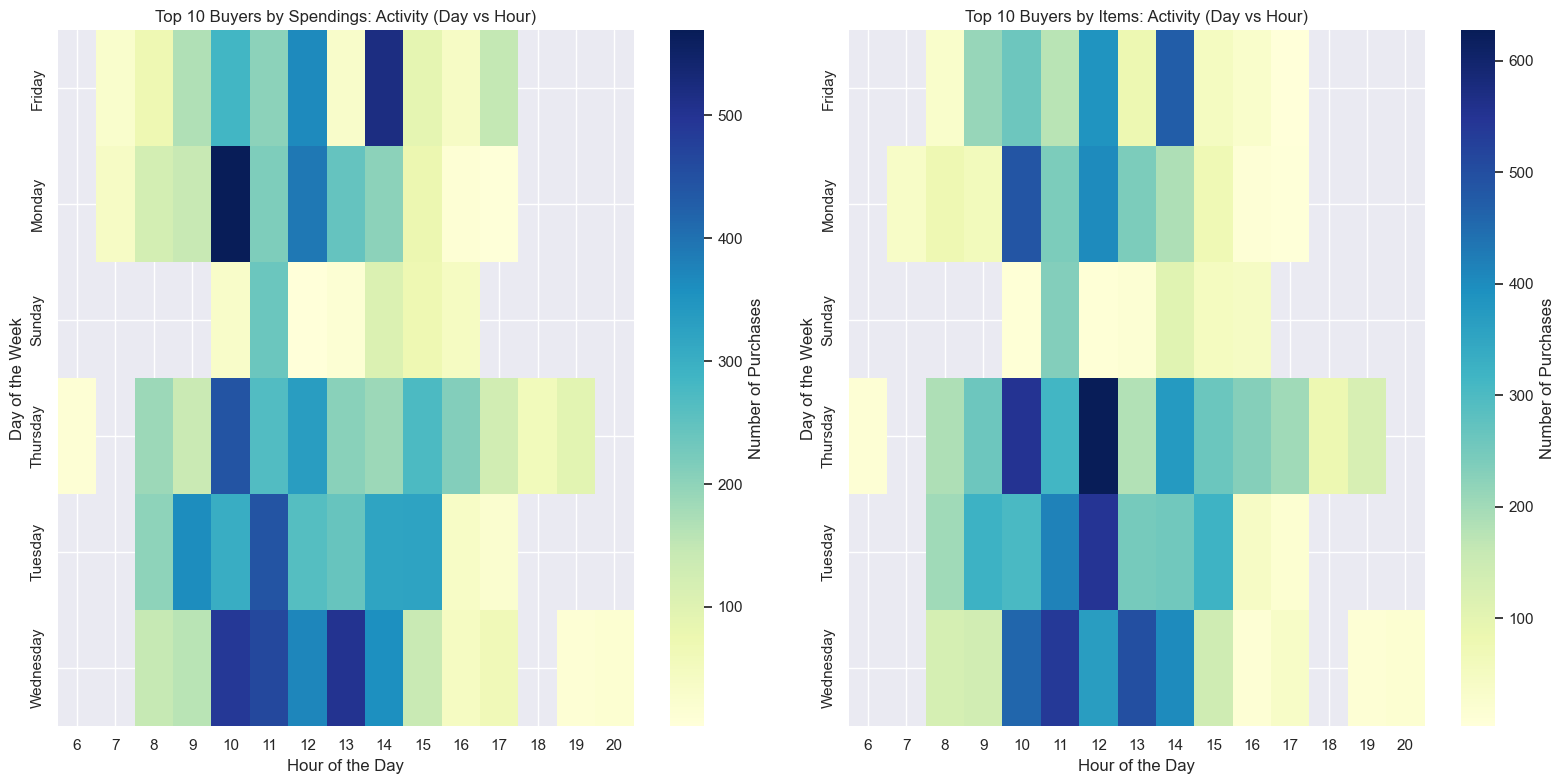

In [359]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

sns.heatmap(
    spenders_heatmap_data,
    cmap='YlGnBu',
    annot=False,
    cbar_kws={'label': 'Number of Purchases'},
    ax=axs[0]
)
axs[0].set_title('Top 10 Buyers by Spendings: Activity (Day vs Hour)')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Day of the Week')

sns.heatmap(
    items_heatmap_data,
    cmap='YlGnBu',
    annot=False,
    cbar_kws={'label': 'Number of Purchases'},
    ax=axs[1]
)
axs[1].set_title('Top 10 Buyers by Items: Activity (Day vs Hour)')
axs[1].set_xlabel('Hour of the Day')
axs[1].set_ylabel('Day of the Week')

plt.tight_layout()
plt.show()

#### **Overview**
The heatmaps show the activity patterns of the **top 10 buyers** in two different categories:  
1. **By Total Spendings**: The left heatmap visualizes the days and hours when the highest spenders are most active.  
2. **By Total Items Purchased**: The right heatmap visualizes the activity of buyers who purchased the most items.  

#### **Insights**:
1. **Top Buyers by Spending**:
   - High activity observed on **Wednesday and Thursday** during late morning and early afternoon (10 AM to 1 PM).
   - Comparatively less activity during weekends, particularly Sunday.
   - The most intense spending hour appears to be around **11 AM on Wednesday**.

2. **Top Buyers by Items**:
   - Peak activity is observed during similar timeframes as spending (10 AM to 12 PM), but spread across more days, including Tuesday and Wednesday.
   - These buyers have significant activity even on weekends (Sunday and Saturday) compared to spenders.
   - The largest concentration of purchases by item count happens around **9 AM to 10 AM**.

#### **Comparison**:
- While both groups have overlapping peak times during midweek mornings, buyers focused on spending tend to cluster their activity more tightly within specific days (Wednesday, Thursday).
- Buyers focused on items show a broader spread in both activity time and days, including more weekend participation.

#### **Actionable Insights**:
- **Promotions**: Focus promotions targeting the top spenders during **midweek mornings** (e.g., special offers around 10 AM–1 PM on Wednesday and Thursday).
- **Restocking**: Ensure stock availability for high-quantity buyers during the **9 AM to 10 AM slot**, particularly on Tuesday and Wednesday.
- **Weekend Strategies**: Enhance engagement for top spenders during weekends as this segment shows reduced activity compared to item buyers.

## 6: Top Productive Month
Products on every month are not sold at the same quantity. We'll look into the top productive month, and the top selling products on those month.

In [360]:
top_productive_month = successful_orders.groupby('MonthName').agg(
    TotalQuantities=('InvoiceNo', 'nunique'),
    TotalValues=('TotalPrice', 'sum')
).reset_index()

In [361]:
top_productive_month = top_productive_month.sort_values(by='TotalValues', ascending=False)

top_productive_month

,MonthName,TotalQuantities,TotalValues
9,November,2884,1503866.780
2,December,2468,1459243.060
10,October,2129,1151263.730
11,September,1896,1056435.192
8,May,1731,769296.610
6,June,1576,760547.010
1,August,1409,735717.260
5,July,1540,718076.121
7,March,1531,716215.260
4,January,1120,689811.610


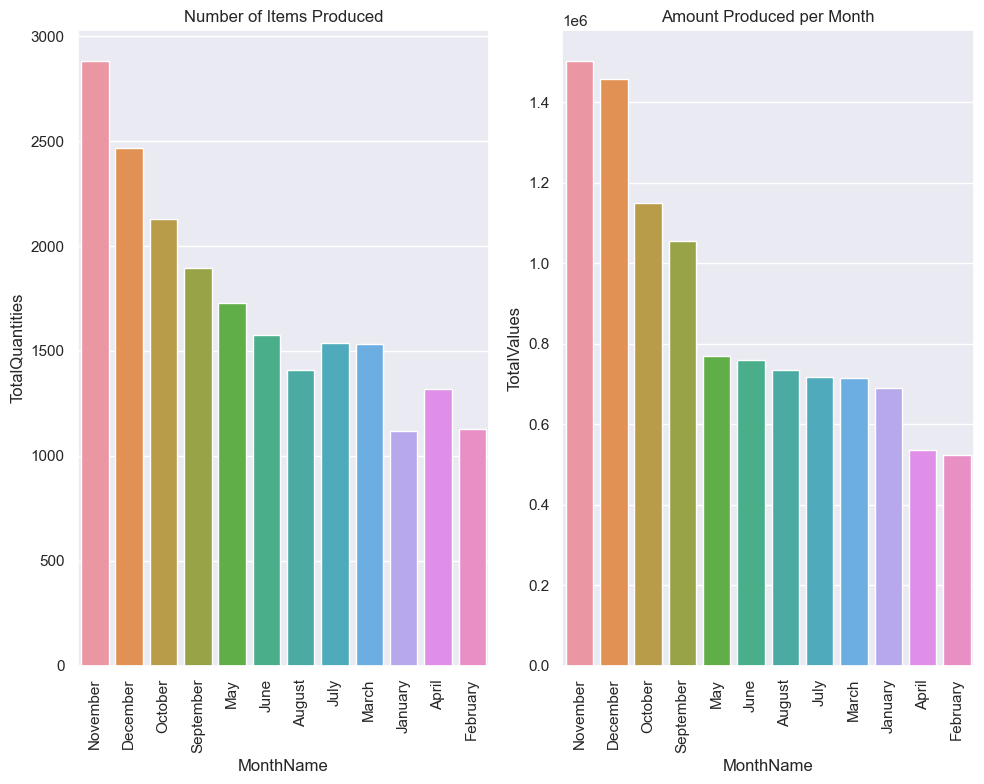

In [362]:
fig, axs = plt.subplots(1, 2, figsize=(10, 8))

sns.barplot(x='MonthName', y='TotalQuantities', data=top_productive_month, ax=axs[0])
axs[0].set_title('Number of Items Produced')
axs[0].tick_params(axis='x', rotation=90) 

sns.barplot(x='MonthName', y='TotalValues', data=top_productive_month, ax=axs[1])
axs[1].set_title('Amount Produced per Month')
axs[1].tick_params(axis='x', rotation=90) 

plt.tight_layout()
plt.show()

### Key Observations:

1. **Top-Performing Months**:
   - **November**:
     - The highest total quantity sold: **2,884**.
     - The highest total sales value: **1,503,866.78**.
     - Likely influenced by holiday shopping, end-of-year events, or seasonal demand.
   - **December**:
     - The second-highest in both total quantity (**2,468**) and total value (**1,459,243.06**).
     - Indicates strong sales during the holiday season or year-end festivities.
   - **October**:
     - Ranked third, with **2,129** quantities sold and **1,151,263.73** in sales value.
     - May suggest early holiday shopping or seasonal promotions.

2. **Moderately Performing Months**:
   - **September** and **May**:
     - Both months show strong performances with **1,896** and **1,731** total quantities sold, respectively.
     - Their total values, **1,056,435.19** (September) and **769,296.61** (May), suggest significant contributions to overall sales.
   - **June** and **July**:
     - June: **1,576** quantities sold and **760,547.01** in value.
     - July: Similar, with **1,540** quantities and **718,076.12** in value.

3. **Lowest-Performing Months**:
   - **February and January**:
     - Both months have the lowest total quantities sold, with **1,126** (February) and **1,120** (January).
     - Corresponding values are **522,545.56** (February) and **689,811.61** (January), reflecting limited consumer activity.
   - **April**:
     - While slightly better than January and February, April's sales quantity (**1,318**) and total value (**536,968.49**) are still low compared to other months.

4. **August**:
   - Although it falls within the mid-performing range for total quantities (**1,409**), the sales value (**735,717.26**) indicates relatively higher-priced products sold during this month.

---

### Insights:
- **Seasonal Peaks**:
   - November and December are the strongest months, likely driven by holiday shopping and end-of-year festivities.
- **Mid-Year Slump**:
   - February, January, and April show significantly lower sales, possibly due to reduced consumer spending post-holidays.
- **Opportunities**:
   - Months like May, June, and September perform well, suggesting opportunities to boost sales further with targeted campaigns.
- **August Value Anomaly**:
   - August demonstrates a higher average sales value per unit, possibly indicating a focus on premium products.

---

### Recommendations:
1. **Increase Inventory for Peak Months**:
   - Stock more for November, December, and October to meet high demand and maximize revenue.

2. **Boost Sales in Low-Performing Months**:
   - Implement promotional offers or marketing campaigns in January, February, and April to stimulate demand.

3. **Leverage Mid-Year Opportunities**:
   - Focus on sustaining sales momentum in May, June, and September with targeted promotions or seasonal product launches.

4. **Analyze August Pricing**:
   - Investigate the premium product trend in August to replicate it in other months.

## 7: Sales Trend Over Time

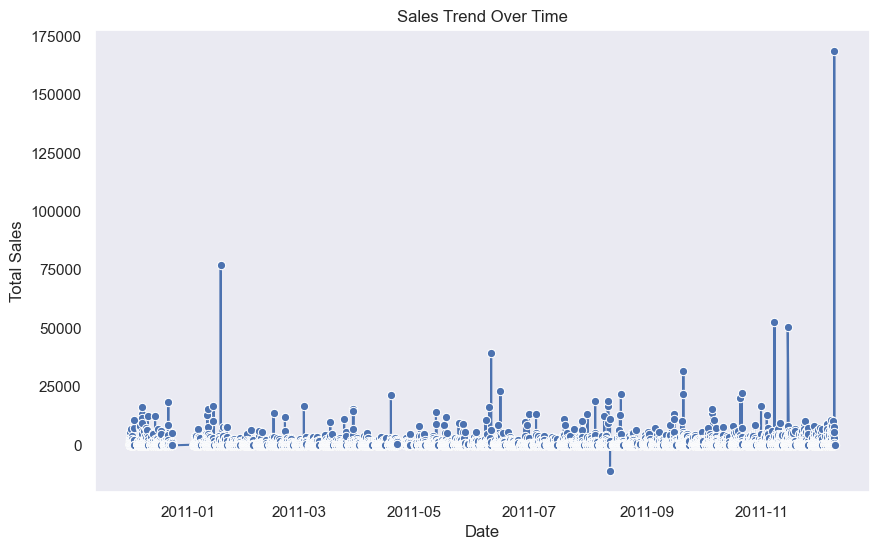

In [363]:
sales_trend =successful_orders.groupby('InvoiceDate')['TotalPrice'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='InvoiceDate', y='TotalPrice', data=sales_trend, marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


#### Daily sales trend over time is not very insightful. It's not easy to understand anything from this trend line. We'll draw a 3 month rolling average sales trend for better understanding.

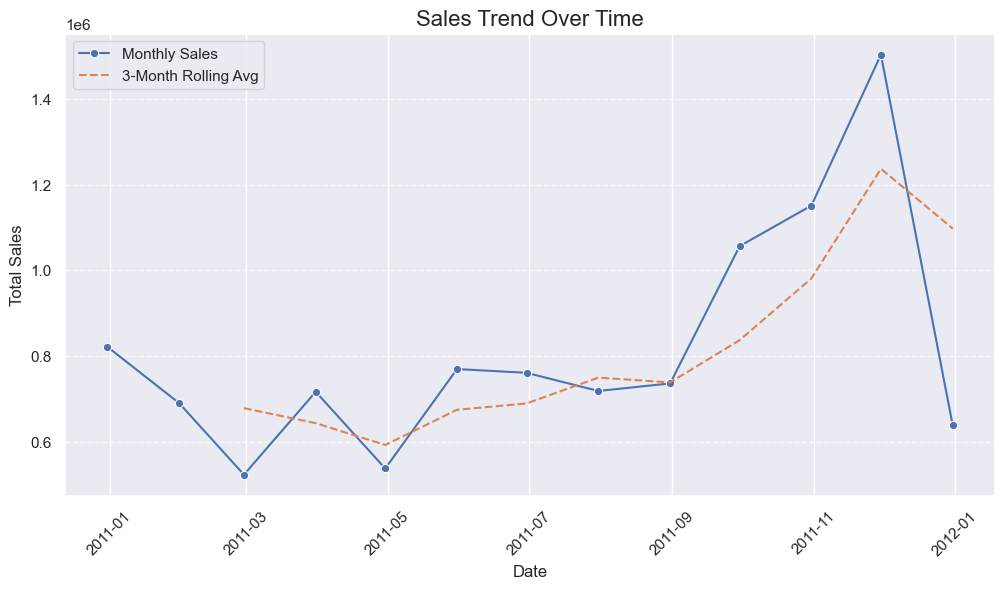

In [364]:
sales_trend = successful_orders.resample('M', on='InvoiceDate')['TotalPrice'].sum().reset_index()

sales_trend['rolling_avg'] = sales_trend['TotalPrice'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x='InvoiceDate', y='TotalPrice', data=sales_trend, marker='o', label='Monthly Sales')
sns.lineplot(x='InvoiceDate', y='rolling_avg', data=sales_trend, marker='', linestyle='--', label='3-Month Rolling Avg')
plt.title('Sales Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


### Key Observations:
1. **Initial Decline** (Jan 2011 - May 2011):
   - Sales start relatively high in January 2011 but decline sharply in the following months, hitting a low around May 2011.
   - This may indicate reduced consumer activity post-holiday season or seasonal effects.

2. **Mid-Year Stability** (June 2011 - August 2011):
   - Sales stabilize, showing smaller fluctuations during the middle of the year.
   - The rolling average indicates consistent but lower levels of sales activity.

3. **Significant Growth** (September 2011 - November 2011):
   - Sales experience a rapid increase from September, peaking in **November 2011**.
   - This sharp rise aligns with peak shopping seasons, such as holidays, festivals, or year-end promotions.

4. **Sharp Decline** (December 2011 - January 2012):
   - A sudden and steep drop in sales is observed in **December 2011** and continues into **January 2012**.
   - This could be due to the end of holiday shopping and a typical post-holiday slowdown.

5. **Rolling Average Insights**:
   - The 3-month rolling average line (orange dashed line) provides a smoothed view of trends, effectively capturing overall seasonal shifts and mitigating monthly volatility.

---

### Potential Causes and Insights:
- **Seasonal Influence**:
   - The sales spike in late 2011 strongly suggests a seasonal or holiday-driven effect, such as Black Friday, Christmas, or end-of-year campaigns.
- **Post-Holiday Slump**:
   - The sharp decline post-November indicates a reduction in consumer spending after the peak shopping period.
- **Mid-Year Lull**:
   - Sales in the middle of the year appear stable but lower, possibly due to reduced shopping activity during off-peak months.

---

### Recommendations:
1. **Prepare for Peak Demand**:
   - Increase inventory and marketing efforts during September-November to maximize revenue during peak periods.
2. **Address Post-Holiday Decline**:
   - Implement targeted promotions or discounts in December and January to sustain consumer interest and boost sales.
3. **Boost Mid-Year Sales**:
   - Introduce mid-year campaigns or promotions to elevate sales during the stable but low-activity months.

## Conclusion
In this project, we analyzed Online Retail dataset and explored various techniques. The analysis revealed that top selling products can be related to seasonal peak. Not coustomers tend to buy certain period of time of the day and few days of the weeks. These findings can help in improving coustomers satisfictions.


### Future Work
To further enhance this project, the following steps can be taken:
1. Collecting more data for better analysis.
2. Visualizing results more interactively using tools like Plotly or Tableau.


### Acknowledgments
Special thanks to Coursera Project Network for providing the dataset and guidance throughout this project.
